### Linear Regression 

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#### Download the Dataset 

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1b90ba9d820>)

#### Read the Dataset

In [162]:
import numpy as np
import pandas as pd 

In [6]:
df = pd.read_csv('medical.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>  Numeriacal columns 
    - age 
    - bmi
    - children
    - charges 
> Categorical columns 
    - sex
    - smoker
    - region 


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Data Analysis and Visualization 

In [12]:
! pip install plotly -q

You should consider upgrading via the 'C:\Users\patel\Projects\projects-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [17]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
%matplotlib inline 

In [18]:
plt.style.use("fivethirtyeight")

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Age 

In [24]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [30]:
fig = px.histogram(df, x='age', marginal='box',
                   nbins=47,title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

##### Body Mass Index 

In [41]:
fig = px.histogram(df, x='bmi', marginal='box',
                   color_discrete_sequence=['blue','red'],
                  title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

##### Charges 

In [49]:
fig = px.histogram(df, x='charges', 
                  marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey']
                   ,title='Annual Medical Charges with Smoker')

fig.update_layout(bargap=0.1)
fig.show()

In [54]:
fig = px.histogram(df, x='charges', 
                   marginal='box', 
                   color='sex',
                   title='Annual Medical Charges with Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [55]:
fig = px.histogram(df, x='charges', 
                  marginal='box',
                  color='region')
fig.update_layout(bargap=0.1)
fig.show()

##### Smoker

In [72]:
smoker_count = df.smoker.value_counts()
smoker = pd.DataFrame([smoker_count, round(smoker_count*100/len(df), 2)], 
            index=['count', 'percentage'])
smoker

,no,yes
count,1064.00,274.00
percentage,79.52,20.48


<AxesSubplot:xlabel='smoker', ylabel='count'>

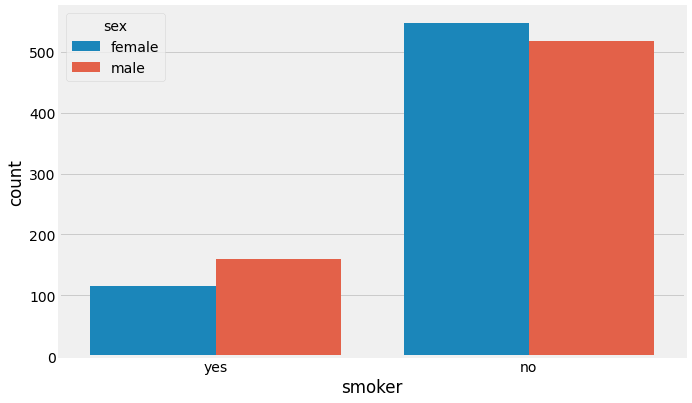

In [58]:
sns.countplot(x='smoker', hue='sex', data=df)

##### Sex 

In [71]:
sex_count = df.sex.value_counts()
sex = pd.DataFrame([sex_count, round(sex_count*100/len(df), 2)], 
                  index=['count', 'percentage'])
sex

,male,female
count,676.00,662.00
percentage,50.52,49.48


#### Region 

In [79]:
region_count = df.region.value_counts()
region_count

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

##### Children 

In [80]:
children_count = df.children.value_counts()
children_count

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

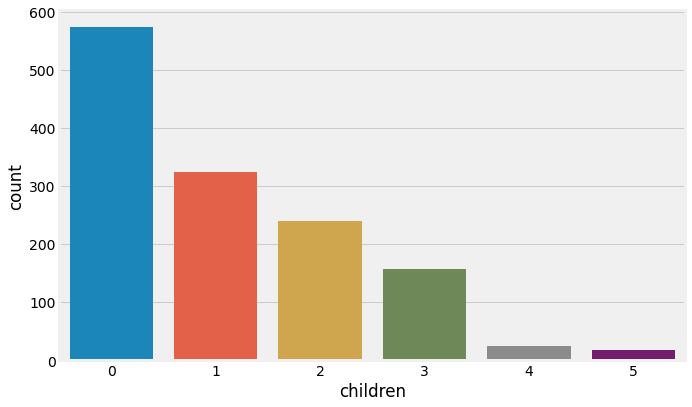

In [82]:
sns.countplot(x='children', data=df);

##### Age and Charges

In [85]:
fig = px.scatter(df, x='age', y='charges', color='smoker',
                opacity=0.8, hover_data=['sex'],
                title='Age vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

##### BMI and Charges 

In [86]:
fig = px.scatter(df, x='bmi', y='charges',
                color='smoker', 
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

##### Region vs Charges 

In [104]:
px.box(df, x='region', y='charges',
      title='Region vs Charges')

##### Children vs Charges

In [103]:
px.violin(df, x='children', y='charges',
          title="Children vs Charges")

##### Correlation 

In [105]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [109]:
# convert smoker column into numeric column 
smoker_numeric = df.smoker.astype('category').cat.codes
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int8

In [110]:
df.charges.corr(smoker_numeric)

0.7872514304984778

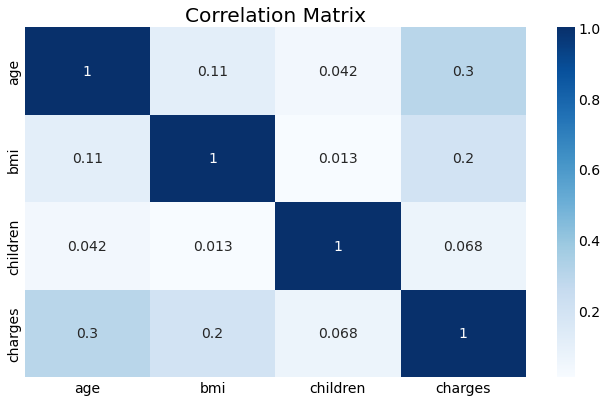

In [114]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title("Correlation Matrix");

### Linear regression using a Single Feature

In [117]:
non_smoker_df = df[df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


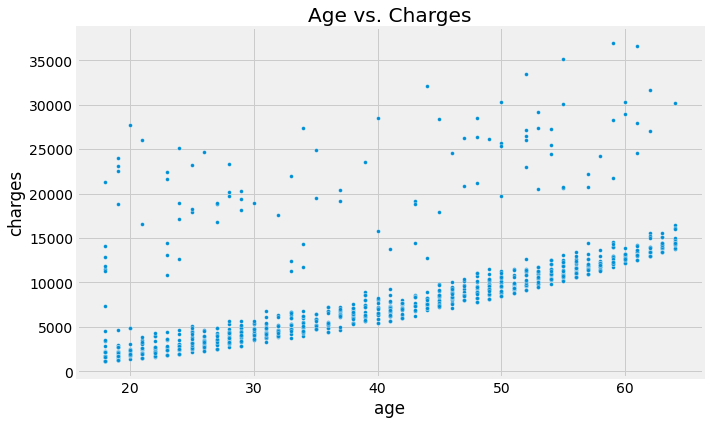

In [122]:
plt.title("Age vs. Charges")
sns.scatterplot(data=non_smoker_df, x='age', y='charges',
               s=15);

In [123]:
def estimate_charges(age, w, b):
    return w*age + b

In [124]:
# guess the parameters 
w, b = 70, 100

In [126]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [165]:
estimated_charges = estimate_charges(ages, 
                                     calculated_slope,
                                     calculated_intercept)
estimated_charges

1        2719.059874
2        5391.549003
3        6727.793567
4        6460.544654
5        6193.295741
            ...     
1332    11805.522911
1333    11271.025085
1334     2719.059874
1335     2719.059874
1336     3520.806613
Name: age, Length: 1064, dtype: float64

In [166]:
np.sqrt(((target - estimated_charges)**2).sum() / len(non_smoker_df))

4662.505766636395

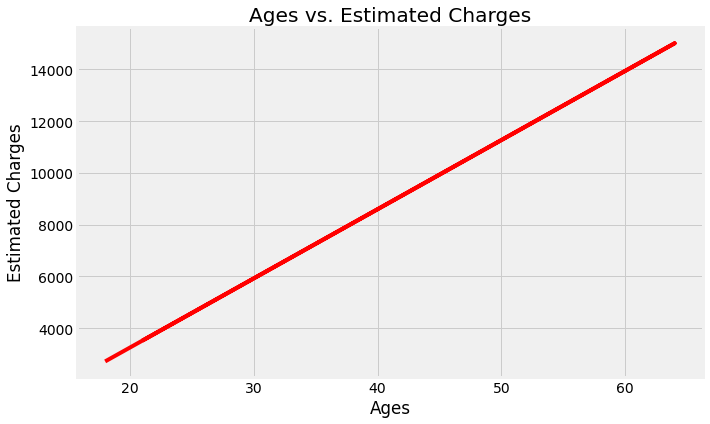

In [167]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Ages'), plt.ylabel("Estimated Charges");
plt.title("Ages vs. Estimated Charges");

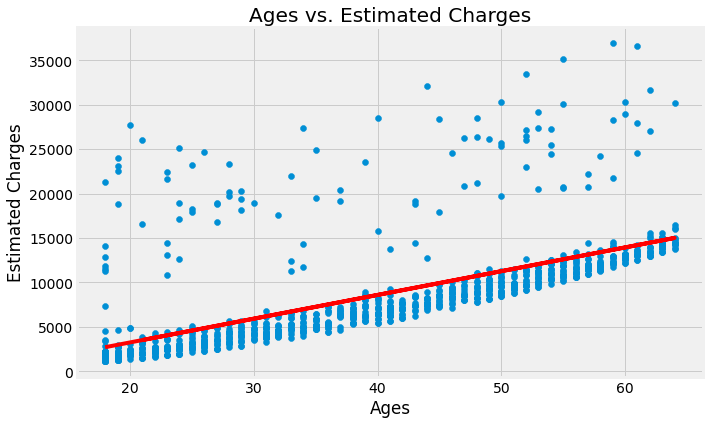

In [168]:
target = non_smoker_df.charges
 
plt.scatter(ages, target)
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Ages'), plt.ylabel("Estimated Charges");
plt.title("Ages vs. Estimated Charges");

In [144]:
r = target.corr(ages)
r

0.6279467837664197

In [145]:
std_y, std_x = target.std(), ages.std()

In [146]:
calculated_slope = r * (std_y / std_x)

In [164]:
calculated_intercept = target.mean() - (calculated_slope* ages.mean())